<a href="https://colab.research.google.com/github/Eezzeldin/candy/blob/ATE/candy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
#!pip install gplearn

In [10]:
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv ("/content/candy-data.csv")
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [12]:
rare_cols  = ["peanutyalmondy" , "nougat" , "bar" , "hard" , "caramel" , 'crispedricewafer']
data ["rare"] = 0
for r in rare_cols : data ["rare"] = data ["rare"] + data [r]
data ["rare"] = np.where (data ["rare"] >= 1 , 1 , 0)

In [13]:
data ["peanutyalmondy"].value_counts()

peanutyalmondy
0    71
1    14
Name: count, dtype: int64

array([[<Axes: title={'center': 'chocolate'}>,
        <Axes: title={'center': 'fruity'}>,
        <Axes: title={'center': 'caramel'}>,
        <Axes: title={'center': 'peanutyalmondy'}>],
       [<Axes: title={'center': 'nougat'}>,
        <Axes: title={'center': 'crispedricewafer'}>,
        <Axes: title={'center': 'hard'}>,
        <Axes: title={'center': 'bar'}>],
       [<Axes: title={'center': 'pluribus'}>,
        <Axes: title={'center': 'sugarpercent'}>,
        <Axes: title={'center': 'pricepercent'}>,
        <Axes: title={'center': 'winpercent'}>],
       [<Axes: title={'center': 'rare'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

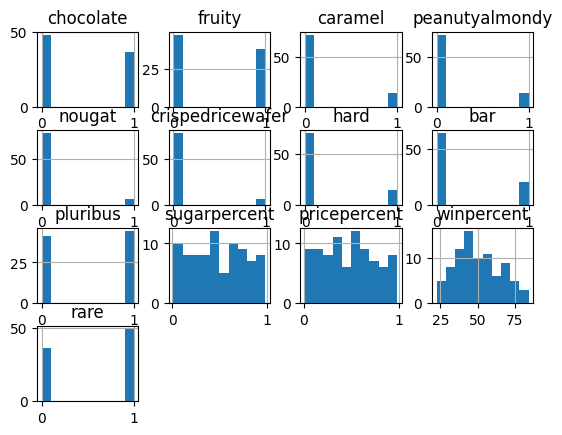

In [14]:
data.hist()

In [16]:
y_col            = "winpercent"
non_feature_cols = ["competitorname",
                    "pricepercent" ,
                    "sugarpercent" ,
                    "fruity",
                    y_col
                    ]
for r in rare_cols :      non_feature_cols.append (r)
X                = data.drop (non_feature_cols,axis =1)
X

,chocolate,pluribus,rare
0,1,0,1
1,1,0,1
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
80,0,0,0
81,0,0,1
82,0,1,0
83,0,0,1


In [17]:
X.corr ()

,chocolate,pluribus,rare
chocolate,1.000000,-0.339675,0.416387
pluribus,-0.339675,1.000000,-0.446216
rare,0.416387,-0.446216,1.000000


array([[<Axes: title={'center': 'chocolate'}>,
        <Axes: title={'center': 'pluribus'}>],
       [<Axes: title={'center': 'rare'}>, <Axes: >]], dtype=object)

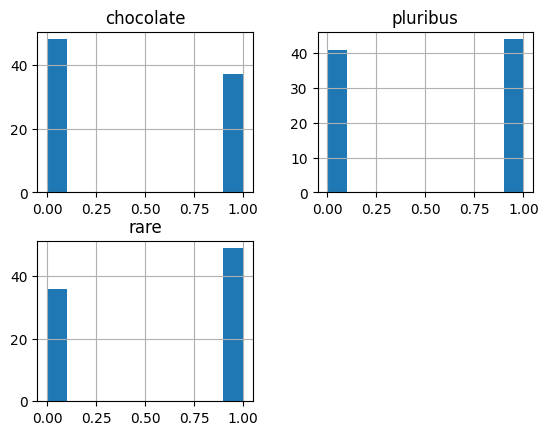

In [18]:
X.hist ()

In [19]:
y = data [y_col]
y

0     66.971725
1     67.602936
2     32.261086
3     46.116505
4     52.341465
        ...    
80    45.466282
81    39.011898
82    44.375519
83    41.904308
84    49.524113
Name: winpercent, Length: 85, dtype: float64

<Axes: >

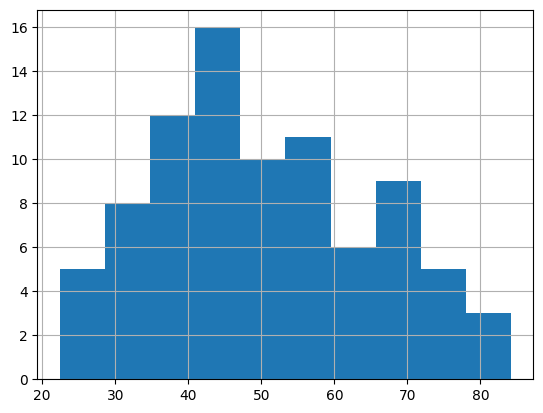

In [20]:
y.hist()